# **MA336 - FINAL PROJECT**
### Name : Bharath Bandi Ramakrishna
### Registration Number : 2311347

<hr></hr>
<h1><center>Diamond Price Prediction</center></h1>

Diamonds are the most valued for their rarity and also a significant investment. Predicting the price of a diamond is a challenging task influenced by various factors such as cut, clarity, color and much more. 

In this project, I have taken a sample dataset which provides various characteristics of a diamond which can be used in predicting the price. I have performed some priliminary analysis on these dataset and developed few machine learning models to predict the price of diamonds based on its characteristics.

I have also used k-fold cross validation and dimensionality reduction techniques which helps in increasing models performance and predicting the diamons price accuratily.

#### Importing required libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.linear_model import Lasso, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score 
import warnings
warnings.filterwarnings("ignore")

#### Importing diamond price prediction dataset

In [123]:
train_dataset = pd.read_csv('./train.csv')

In [124]:
train_dataset.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### Dataset features </br>

Id - Diamond sample ID </br>
Carat -  Caret weight of the diamond </br>
Cut - Cut quality of the diamond </br>
Color - Color of the diamond with D being the best and J being the worst </br>
Clarity - Clarity of the diamond </br>
Depth -  The height of a diamond, measured from the culet to the table, divided by its average girdle diameter </br>
Table - The width of the diamond's table expressed as a percentage of its average diameter </br>
X - Length of the diamond in mm </br>
Y - Width of the diamond in mm </br>
Z - Height of the diamond in mm </br>
Price - Price of the diamond </br>

#### Priliminary analysis and feature engineering

In [125]:
train_dataset.shape

(193573, 11)

The diamond dataset consists of 11 features and 193573 observations. Here observations are samples of variety of diamonds and their features. In this 11 features we can consider price feature as our target variable.

In [126]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


This is the summary of the dataset which includes columns and its datatypes along with non-null values. 

In [127]:
train_dataset.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


This is descriptive statistics of of numerical columns in the dataset.

In [128]:
train_dataset.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Checking for null values in the dataset. Here we can observe that there are no null values in the dataset.

In [129]:
train_dataset.duplicated().sum()

0

Checking for duplicates in the dataset. Here we can observe that there are no duplicates in the dataset.

In [130]:
train_dataset.drop(['id'], axis = 1, inplace = True)

Since ID is just the diamond sample number and not a diamond feature which has no impact on the dimond price pridction. Hence we can drop the id feature from the dataset.

In [131]:
print('The different categorical values for cut are - ', train_dataset['cut'].unique())
print('The different categorical values for clarity are - ', train_dataset['clarity'].unique())
print('The different categorical values for color are - ', train_dataset['color'].unique())

The different categorical values for cut are -  ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
The different categorical values for clarity are -  ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']
The different categorical values for color are -  ['F' 'J' 'G' 'E' 'D' 'H' 'I']


In this dataset we have three categorical features i'e Cut, Clarity and Color. Here we can see different values used in these categorical features.

[Text(0, 0, '49910'),
 Text(0, 0, '37566'),
 Text(0, 0, '92454'),
 Text(0, 0, '11622'),
 Text(0, 0, '2021')]

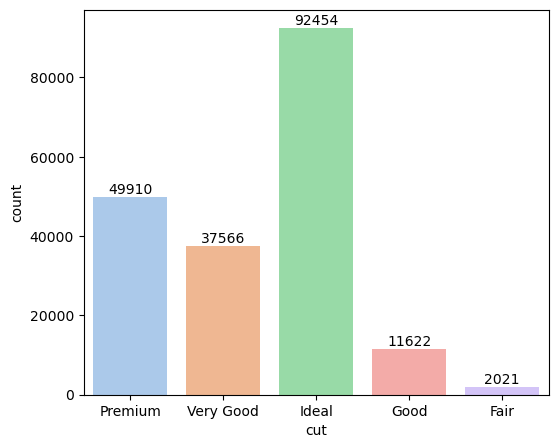

In [132]:
plt.figure(figsize=(6,5))
cut_plot = sns.countplot(data=train_dataset, x='cut', palette=sns.color_palette("pastel"))
cut_plot.bar_label(cut_plot.containers[0])

[Text(0, 0, '48027'),
 Text(0, 0, '30484'),
 Text(0, 0, '30669'),
 Text(0, 0, '53272'),
 Text(0, 0, '4219'),
 Text(0, 0, '15762'),
 Text(0, 0, '10628'),
 Text(0, 0, '512')]

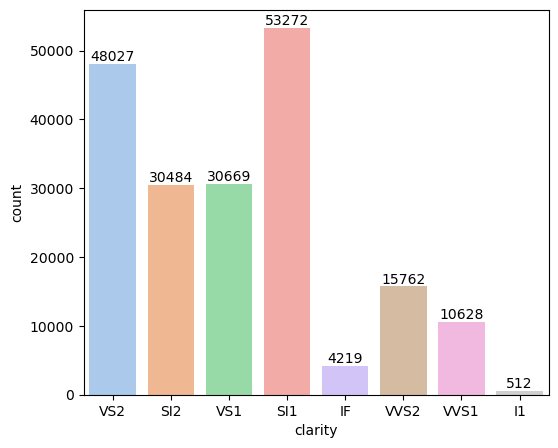

In [133]:
plt.figure(figsize=(6,5))
cut_plot = sns.countplot(data=train_dataset, x='clarity', palette=sns.color_palette("pastel"))
cut_plot.bar_label(cut_plot.containers[0])

[Text(0, 0, '34258'),
 Text(0, 0, '6456'),
 Text(0, 0, '44391'),
 Text(0, 0, '35869'),
 Text(0, 0, '24286'),
 Text(0, 0, '30799'),
 Text(0, 0, '17514')]

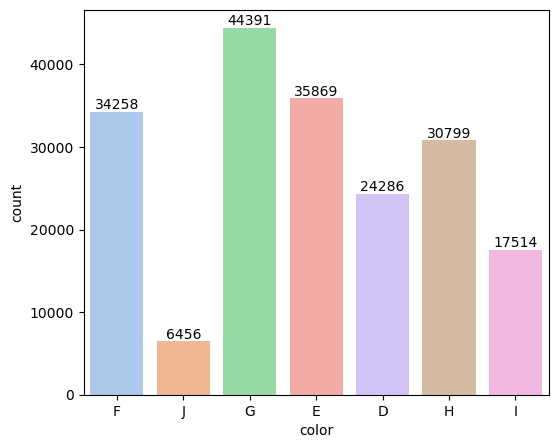

In [134]:
plt.figure(figsize=(6,5))
cut_plot = sns.countplot(data=train_dataset, x='color', palette=sns.color_palette("pastel"))
cut_plot.bar_label(cut_plot.containers[0])

Here we can see the count plot of these categorical features which indicates the number of diamond samples per categorical value of each feature.

<hr></hr>
Ordinal encoding is the process of converting the categorical data into numerical data. Here we will be converting cut, color and clarity categorical features before proceding further and using this data in training the machine learning models.

In [136]:
def ordinalEncoderFn(data, column_names):
  encoder = OrdinalEncoder()
  encoder.fit(data[column_names])
  data[column_names] = encoder.transform(data[column_names])
  return data

In [137]:
encodedData = train_dataset.copy()
ordinalEncoderFn(encodedData, ['cut',	'color', 'clarity'])
encodedData

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3.0,2.0,5.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4.0,6.0,3.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2.0,3.0,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2.0,3.0,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3.0,3.0,5.0,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,2.0,0.0,7.0,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,3.0,3.0,7.0,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,4.0,2.0,2.0,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,4.0,0.0,2.0,62.9,55.0,4.45,4.49,2.81,681


Once ordinal encoding is performed, we will be scaling the data using the StandardScaler method. Since all the features has different scales in the dataset, I choose the StandardScaler for scaling the data to ensure that all features contribute to the learning process equally.

In [138]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(encodedData)
scaled_dataset = pd.DataFrame(scaled_data, columns=encodedData.columns)
scaled_dataset

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.576255,0.481316,-0.318009,0.723930,0.350768,0.402496,1.401353,1.460456,1.474414,2.391912
1,2.678513,1.587913,2.146431,-0.501349,0.165874,0.402496,2.113437,2.177120,2.200187,2.334406
2,-0.196003,-0.625280,0.298101,0.111291,-0.573702,-0.118652,-0.022816,0.008986,-0.049710,-0.296740
3,-1.017293,-0.625280,0.298101,0.111291,-0.203914,-0.639801,-1.203614,-1.188477,-1.196432,-0.818755
4,1.965288,0.481316,0.298101,0.723930,0.720555,0.923644,1.743874,1.714463,1.793754,2.598636
...,...,...,...,...,...,...,...,...,...,...
193568,-1.038906,-0.625280,-1.550229,1.949210,-0.666149,-0.639801,-1.230655,-1.206620,-1.254494,-0.703743
193569,-0.196003,0.481316,0.298101,1.949210,-1.405724,0.402496,0.031267,0.045273,-0.093257,-0.271457
193570,-0.131164,1.587913,-0.318009,-1.113989,1.182790,-0.118652,0.004226,0.027129,0.124475,-0.231302
193571,-0.974067,1.587913,-1.550229,-1.113989,0.997896,-1.160949,-1.140517,-1.115903,-1.051277,-0.815037


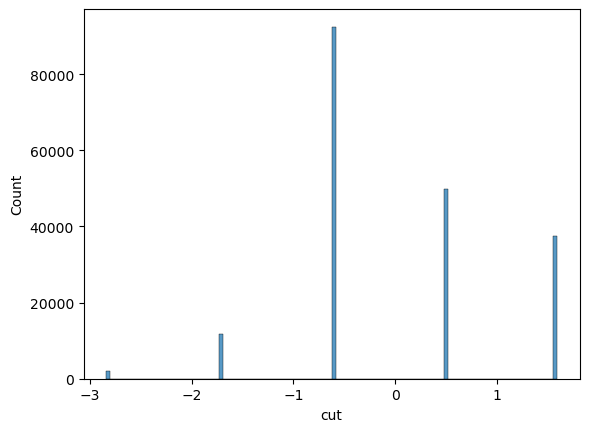

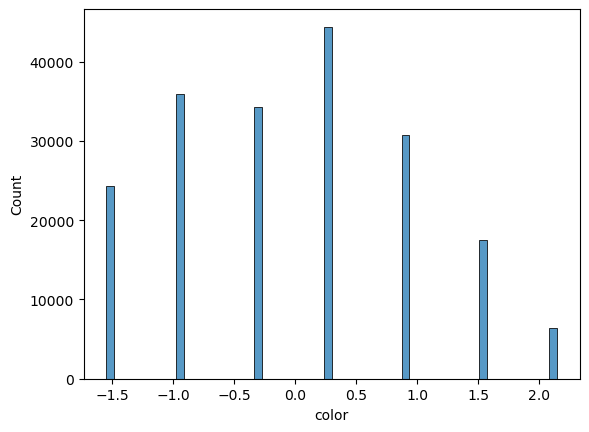

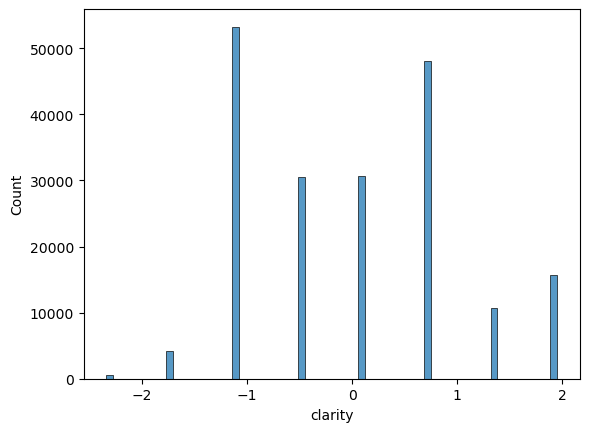

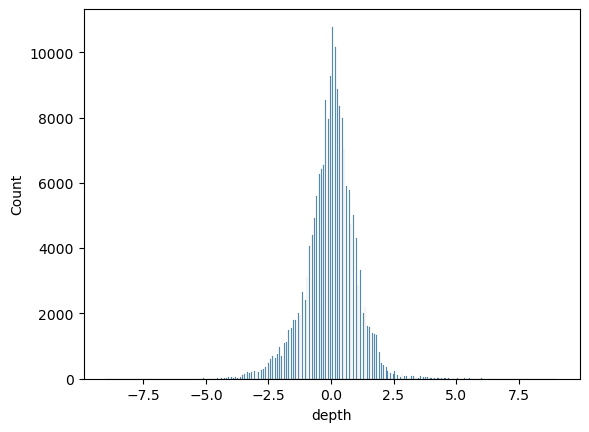

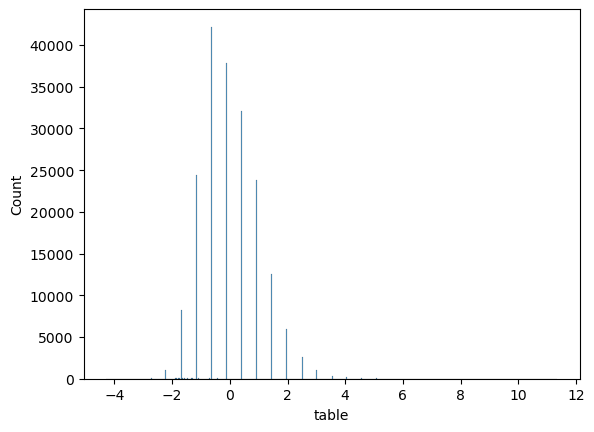

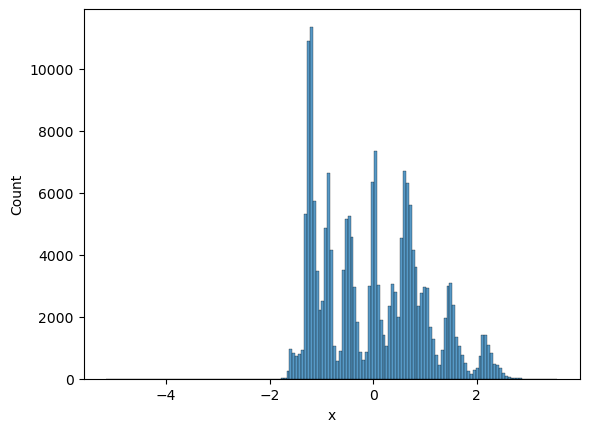

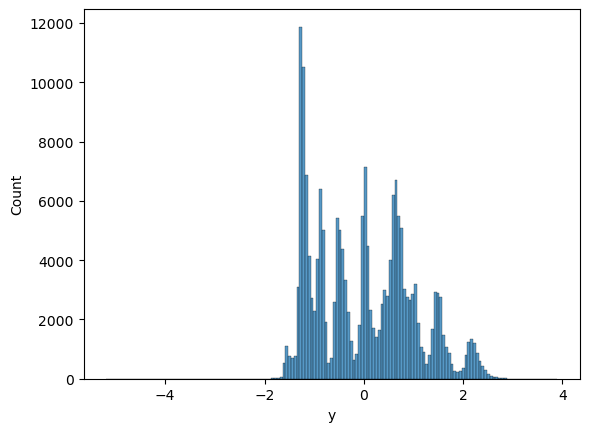

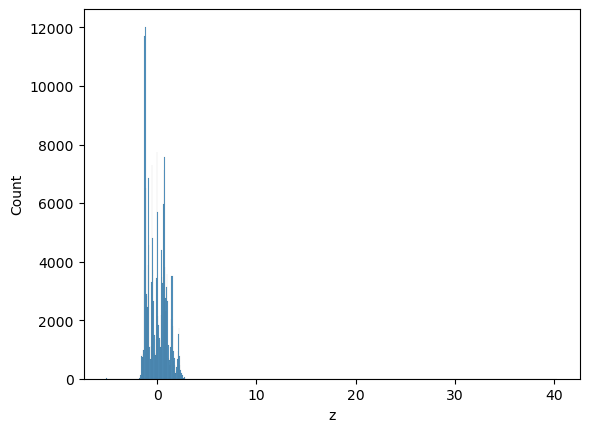

In [139]:
for i in scaled_dataset.columns[1:9]:
    sns.histplot(data=scaled_dataset, x=i)
    plt.show()

From the above histplots of all the features, we can conclude that data is skewed equally.

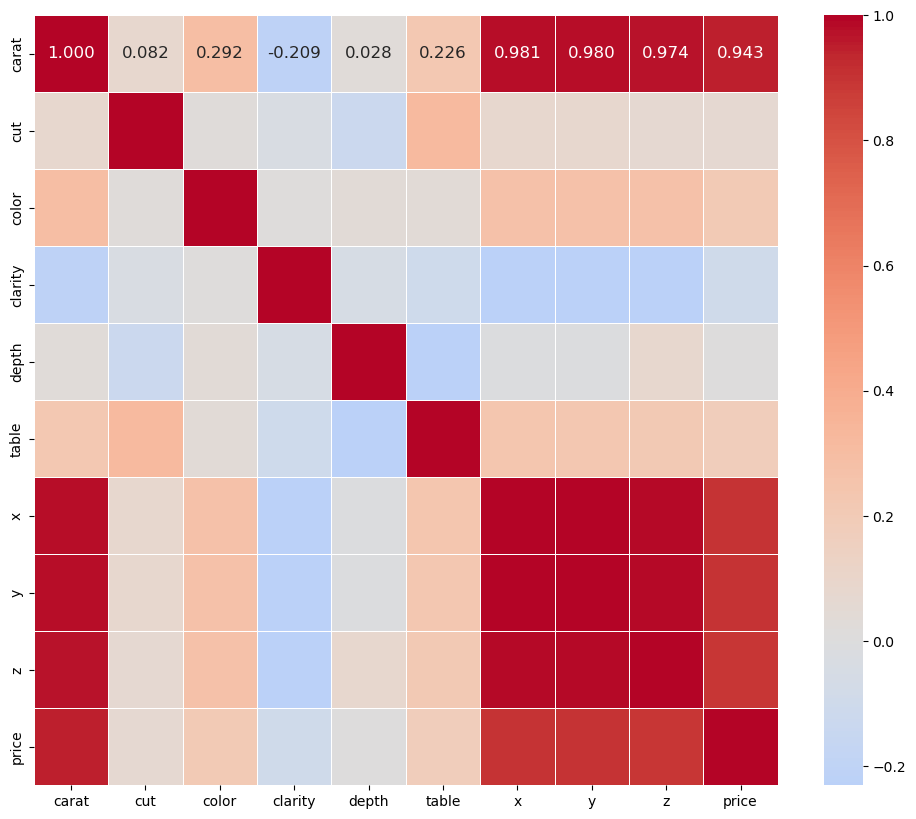

In [140]:
plt.figure(figsize = (12,10))
sns.heatmap(scaled_dataset.corr(), center = 0, cmap = 'coolwarm', annot=True, fmt=".3f", linewidths=.5, annot_kws={"size": 12})
plt.show()

Since, priliminary analysis and feature engineering is performed on the dataset. Now, we can segregate the dataset into input and output data which we will be using to train the models. Since price is our output variable, we can drop this feature from the dataset and assign it to new variable 'output' and remaining data will be assigned to 'input' variable. Now we can use this input and output variables to train the models. 

In [141]:
output = scaled_dataset['price']
input = scaled_dataset.drop(['price'], axis=1)

In [142]:
input.head(5)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.576255,0.481316,-0.318009,0.723930,0.350768,0.402496,1.401353,1.460456,1.474414
1,2.678513,1.587913,2.146431,-0.501349,0.165874,0.402496,2.113437,2.177120,2.200187
2,-0.196003,-0.625280,0.298101,0.111291,-0.573702,-0.118652,-0.022816,0.008986,-0.049710
3,-1.017293,-0.625280,0.298101,0.111291,-0.203914,-0.639801,-1.203614,-1.188477,-1.196432
4,1.965288,0.481316,0.298101,0.723930,0.720555,0.923644,1.743874,1.714463,1.793754


In [143]:
output.head(5)

0    2.391912
1    2.334406
2   -0.296740
3   -0.818755
4    2.598636
Name: price, dtype: float64

Here we are defining all the required variables with default values which are used accross all the models while training and predicting.

In [144]:
model_accuracies = {} # Used to store the model accuracies obtained from k-fold cross validation method
model_accuracies_dim_redu = {} # Used to store the model accuracies obtained from dimensionality reduction method
cv_values = [2, 3, 4, 5, 6, 7, 8, 9, 10] # Set of values which are used as k-fold value
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # Set of alpha values which are used for lasso and ridge models
n_estimators = [2, 4, 8, 16, 32, 64] # Set of estimator values used for random forest and gradient boosting modles
max_depths = list(range(1,10)) # Set of tree max-depth values used for random forest, decision tree and gradient boosting modles
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5] # Set of learning rate values used for gradient boosting model
svm_c = list(range(1,5)) # Set of C values which are used in SVM model as regularization parameter

Here we are splitting the input and output data into train and test datasets which are used for model training and prediction.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=2311347)

#### Dimensionality Reduction
Dimensionality reduction is the process of reducing high-dimensional data into low-dimensional data without loosing the important information and patterns. Dimensionality reduction techniques are often used in machine learning. There are various dimensionality reduction methods but here we have used PCA and Variance methods which are simple and effective methods.

##### Dimensionality reduction using PCA
PCA is a dimensionality reduction techinique which calculates the principal components from the data. PCA will calculate covariance matrix of data which has pairwise relationship between features. The components which are contributing more to the dataset will be choosen as new features to train the models.

In [146]:
pca = PCA()
pca_transform = pca.fit_transform(input)
pca_data = pd.DataFrame(pca_transform)
input_pca = pca_data.iloc[:,0:6]
input_pca
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(input_pca, output, test_size=0.33, random_state=2311347)

<Axes: >

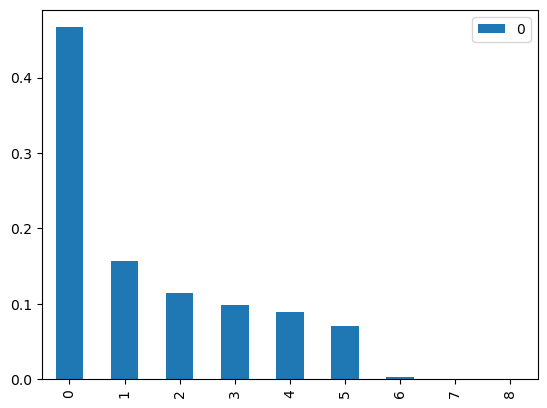

In [147]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()

From the above bar plot, we can conclude that first 6 principal components are contributing more to the dataset compared to remaining 3 features. Therefor, we will be using these 6 features to train our models.

##### Dimensionality reduction using variance method
Variance is the another dimensionality reduction methods which is used for feature selection. The feature with high variance contribute more variability to the dataset and vice-versa. Therefore, we will be selecting features with more variance as our input features to train the machine learning models.

In [148]:
corr_matrix = scaled_dataset.corr()['price']
corr_data_columns = corr_matrix[corr_matrix > 0.1].to_frame('corr').index.tolist()
corr_data_columns
corr_data = scaled_dataset[corr_data_columns]
corr_data
output_corr = corr_data['price']
input_corr = corr_data.drop(['price'], axis=1)
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(input_corr, output_corr, test_size=0.33, random_state=2311347)

## Machine Learning Regression Models
Machine learning regression models are used to predict continuous numerical values based on the given input features. These models are trained from the labelled input features to make prediction on new dataset. There are many machine learning regression modles which can we used based on various factors like amount of data available and problem complexity. Here, we will be working on various machine learning models to predict the diamond price.

#### K-Fold Cross Validation
K-fold cross validation is a re-sampling method whcih is used to evaluate the performance of the machine learning models. It helps in calculating accurate machine learning model performance and ensures that this performance is consistant with other subsets of the data.

We will be performing k-fold cross validation for all the machine learning models which are implemented to evaluate the accurate and optimal modle performance.

#### Linear Regression
Linear regression is one of the most simple and commonly used machine learning model used for regression problem analysis. 

Here, we will we using this model to finilize some hyper parameters which will be used in other machine learning modles. we will also we using this model to find the best dimensionality reduction method we need to use to train our machine learing models for better performance and predictions.

In [149]:
linear_model = LinearRegression()

In [150]:
cv_value = 3
lr_accuracy = 0
for cv in range(3,25):
    linear_scores = cross_val_score(linear_model, input, output, cv=cv)
    if lr_accuracy < linear_scores.mean():
        lr_accuracy = linear_scores.mean()
        cv_value = cv_value
print('The optimal CV value is ->', cv_value)
print('The accuracy of Linear Regression model is ' + str(linear_scores.mean()))
model_accuracies['Linear Regression'] = lr_accuracy

The optimal CV value is -> 3
The accuracy of Linear Regression model is 0.9242430774447418


In [151]:
scores = cross_val_score(linear_model, input_pca, output, cv=cv_value)
scores.mean()

0.85427625321133

In [152]:
linear_model_scores = cross_val_score(linear_model, input_corr, output_corr, cv=cv_value)
linear_model_scores.mean()
model_accuracies_dim_redu['Linear Regression'] = linear_model_scores.mean()
linear_model_scores.mean()

0.9124690228925312

From the above model predictions, we can see that linear model's accuracy is 87% when we trained the model using PCA dimensionality reduction method and 91% when the model is trained using variance dimensionality reduction method.

From this we can conclude that variance dimensionality reduction method helps in evaluating the model's performance better compared to PCA method. Therefore, we will be using <b>variance method </b> to train all the models and evaluate its performance.

The optimal CV value we obtained from linear regression model is <b>3</b>. Therefore, we will be using this value as CV value while performing k-fold cross validation re-sampling method for all the machine learning models.

## Random Forest
Random Forest is an ensemble learning method which constructs multitude of decision trees while training and returns the mode of the classes (classification) or mean prediction (regression) of the individual trees as an output.

In [153]:
rf_accuracy = 0
rf_estimator = 0
rf_depth = 0
for n_estimator in n_estimators:
    for max_depth in max_depths:
        random_forest_model = RandomForestRegressor(n_estimators = n_estimator, max_depth=max_depth)
        random_forest_scores = cross_val_score(random_forest_model, input, output, cv=cv_value)
        if rf_accuracy < random_forest_scores.mean():
            rf_accuracy = random_forest_scores.mean()
            rf_estimator = n_estimator
            rf_depth = max_depth
model_accuracies['Random Forest'] = rf_accuracy

After performing manual grid search for hyper parameter tuning, we have found optimal n_estiamator and max_depth values for random forest regression model. We will be using this optimal values to train the model with data obtained from variance dimensionality reduction method.

In [154]:
print('The accuracy of Random Forest regression model is ', rf_accuracy)
print('The optimal n_estiamator is ', rf_estimator)
print('The optimal max_depth value is ', rf_depth)

The accuracy of Random Forest regression model is  0.9770275028528294
The optimal n_estiamator is  64
The optimal max_depth value is  9


In [155]:
random_forest_model = RandomForestRegressor(n_estimators = rf_estimator, max_depth = rf_depth)
random_forest_scores = cross_val_score(random_forest_model, input_corr, output_corr, cv=cv_value)
random_forest_scores.mean()
model_accuracies_dim_redu['Random Forest'] = random_forest_scores.mean()

## Decision Tree
Decision Tree is a non-parametric supervised machine learning method used for classification and regression tasks. Decision tree predicts  target variable by learning some simple decision rules which are inferred from the features of the data.

In [156]:
dt_accuracy = 0
dt_depth = 0
for max_depth in max_depths:
    decision_tree_model = tree.DecisionTreeRegressor(max_depth = max_depth)
    # for cv_value in cv_values:
    decision_tree_scores = cross_val_score(decision_tree_model, input, output, cv=cv_value)
    if dt_accuracy < decision_tree_scores.mean():
            dt_accuracy = decision_tree_scores.mean()
            dt_depth = max_depth
model_accuracies['Decision Tree'] = dt_accuracy

In [157]:
print('The accuracy of Decision Tree regression model is ', dt_accuracy)
print('The optimal max_depth value is ', dt_depth)

The accuracy of Decision Tree regression model is  0.974809649506776
The optimal max_depth value is  9


After performing manual grid search for hyper parameter tuning, we have found optimal max_depth value for decision tree regression model. We will be using this optimal values to train the model with data obtained from variance dimensionality reduction method.

In [158]:
decision_tree_model = tree.DecisionTreeRegressor(max_depth = dt_depth)
decision_tree_scores = cross_val_score(decision_tree_model, input_corr, output_corr, cv=cv_value)
decision_tree_scores.mean()
model_accuracies_dim_redu['Decision Tree'] = decision_tree_scores.mean()

## Ridge Regression
Ridge Regression which is also known as Tikhonov regularization is a linear regression method which adds regularization step to cost function to imporove model's performance and stop over-fitting.

In [159]:
ridge_accuracy = 0
alpha_value_ridge = 0
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    # for cv_value in cv_values:
    ridge_scores = cross_val_score(ridge_model, input, output, cv=cv_value)
    if ridge_accuracy < ridge_scores.mean():
        ridge_accuracy = ridge_scores.mean()
        alpha_value_ridge = alpha
model_accuracies['Ridge'] = ridge_accuracy
print('The accuracy of Ridge model is ', ridge_accuracy)
print('The optimal alpha_value value is ', alpha_value_ridge)

The accuracy of Ridge model is  0.9242373817738688
The optimal alpha_value value is  0.1


After performing manual grid search for hyper parameter tuning, we have found optimal alpha value for ridge model. We will be using this optimal values to train the model with data obtained from variance dimensionality reduction method.

In [160]:
ridge_model = Ridge(alpha=alpha_value_ridge)
ridge_scores = cross_val_score(ridge_model, input_corr, output_corr, cv=cv_value)
ridge_scores.mean()
model_accuracies_dim_redu['Ridge'] = ridge_scores.mean()

## Gradient Boosting Regression
Gradient Boosting is also a powerful ensemble learning technique used for both regression and classification tasks. This model builds strong machine learning prediction model usually by combining multiple trees also called as weak learners by rectifying errors.

In [ ]:
grad_accuracy = 0
grad_estimator = 0
grad_depth = 0
grad_learning_rate = 0
for n_estimator in n_estimators:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            gradient_model = GradientBoostingRegressor(learning_rate = learning_rate, max_depth = max_depth, n_estimators = n_estimator, random_state = 2311347)
            grad_boost_scores = cross_val_score(gradient_model, input, output, cv=cv_value)
            if grad_accuracy < grad_boost_scores.mean():
                grad_accuracy = grad_boost_scores.mean()
                grad_estimator = n_estimator
                grad_depth = max_depth
                drag_learning_rate = learning_rate
model_accuracies['Gradient Boosting'] = grad_accuracy
print('The accuracy of Gradient Boosting model is ', grad_accuracy)
print('The optimal n_estiamator is ', grad_estimator)
print('The optimal max_depth value is ', grad_depth)
print('The optimal learning rate value is ', grad_learning_rate)

After performing manual grid search for hyper parameter tuning, we have found optimal n_estimator, max_depth and learning ratevalues for gradient boosting model. We will be using this optimal values to train the model with data obtained from variance dimensionality reduction method.

## SVM (Support Vector Machine)
Support Vector Machine (SVM) is a powerful supervised machine learning model used for both classification and regression tasks which performs well in high-dimensional feature spaces. 

Since SVM performs better on more number of features, we will use get_dummies method for data manipulation. Here we will be converting categorical features into dummy variables with binary value indicating each categorical value.

In [ ]:
svm_dataset= pd.get_dummies(train_dataset, ['cut',	'color', 'clarity'])

Here we are converting categorical binary data into numerical values.

In [ ]:
svm_dataset = svm_dataset*1

In [ ]:
svm_dataset.head(5)

In [ ]:
svm_dataset.shape

In [ ]:
model_accuracies['SVM'] = 0.76

After performing get_dummies method, we have 27 features and 193573 observations.

In [ ]:
output_svm = svm_dataset['price']
input_svm = svm_dataset.drop(['price'], axis=1)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(input_svm, output_svm, test_size=0.33, random_state=2311347)

Here we will segregate the SVM dataset into input and output data which we will be using to train the models. Since price is our output variable, we can drop this feature from the dataset and assign it to new variable 'output' and remaining data will be assigned to 'input' variable. Now we can use this input and output variables to train the models. Later, we will split the input and output data into train and test datasets which are used for model training and prediction.

In [ ]:
svm_accuracy = 0
c_val = 0
for c in svm_c: 
    svm_model = make_pipeline(StandardScaler(), SVR(C=c))
    svm_scores = cross_val_score(svm_model, input_svm, output_svm, cv=3)
    print(svm_scores.mean())
    if svm_accuracy < svm_scores.mean():
        svm_accuracy = svm_scores.mean()
        c_val = c
model_accuracies['SVM'] = svm_accuracy

In [ ]:
Print('The accuracy of SVM model is ', svm_accuracy)
print('The optimal C value is ', c_val)

In [ ]:
accuracies_arr = np.arange(len(model_accuracies))
accuracy_plot = plt.subplot(111)
accuracy_plot.bar(accuracies_arr, model_accuracies.values(), width=0.2, color='b', align='center')
plt.xticks(accuracies_arr, model_accuracies.keys())
plt.title("Accuracy of Different Machine Learning Models - K-fold cross validation", fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
accuracies_arr = np.arange(len(model_accuracies_dim_redu))
accuracy_plot = plt.subplot(111)
accuracy_plot.bar(accuracies_arr, model_accuracies_dim_redu.values(), width=0.2, color='b', align='center')
plt.xticks(accuracies_arr, model_accuracies_dim_redu.keys())
plt.title("Accuracy of Different Machine Learning Models - Dimensionality Reduction", fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## Neural Networks 

Neural networks also known as artificial neural networks are models that are inspired by neural network structure and functionality of the human brain. These model consists of set of nodes aslo reffered as neurons in form of layers. Each neuron is responsible for performing the operations on the input and generate output. Neural networks are used in solving complex tasks such as image recognization, natural language processing (NLP) problems, recomendation systems, health care and much more.

To train the neural networks, first we will split the normalized dataset into train and test datasets using train_test_split function. Here we will be using train dataset as input to train the neural network model with activation function 'relu'. Once training is done, we will be using test dataset to test the trained neural network model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=2311347)

Here we are performing the manual grid search to calculate the optimal neurons required to train the neural network model. Since neural network model works on neurons, finding optimal neurons count is the crutial task while building the model.

In [ ]:
neurons = [4, 8, 16, 32, 64, 96, 128]
optimal_accuracy = 0
optimal_neurons = 0
optimal_history = ''
for neuron in neurons:

    #Creating neural network model 
    model = keras.Sequential([
        
        #Input layer with 9 input features
        layers.Input(shape=(9,)),
        
        #Hidden layer with dynamic neurons and relu as an activation function
        layers.Dense(neuron, activation='relu'),
        
        #Dropout layer to improve the model performance
        layers.Dropout(0.1),
        
        #Output layer with one neuron since we have only one output feature i'e price
        layers.Dense(1, activation='sigmoid')
    ])

    # Here we will compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # We are creating a callback step which has early stopping. This step helps in stopping the model from training when there is no improvement.
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    #Training the neural network model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[callback])

    #Evaluate the model
    test_loss = model.evaluate(X_test, y_test)
    
    #Predicting the model with test dataset
    predictions = model.predict(X_test)

    #Calculating the accuracy
    accuracy = r2_score(y_test, predictions)
    
    if optimal_accuracy < accuracy:
        optimal_accuracy = accuracy
        optimal_neurons = neuron
        optimal_history = history
        
    print('------------------------------------------------------------------------------------')
    print('The overall results of a neural network model build with ', neuron, ' neurons are ', )
    print('Modal Loss is ', test_loss)
    print('Predicted price values are ', predictions)
    print('Root mean square error is ', mean_squared_error(y_test, predictions))
    print('Accuracy of the neural network model is ', accuracy)

In [ ]:
print('optimal number of neurons are ', optimal_neurons)
print('The accuracy of the neural network model is ', optimal_accuracy)

In [ ]:
plt.plot(optimal_history.history['loss'])
plt.plot(optimal_history.history['val_loss'])
plt.title("Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Conclusion

In this report, we have worked on diamond price prediction dataset. We have performed priliminary analysis, data cleaning and feature engineering steps on dataset. Then, we implemented few machine learning regression models to predict the price of the diamonds based on the diamond charestristics. We have performed various steps such as re-sampling the data, k-fold cross validation, dimensionality reduction, hyper parameter tuning to increase the performance of the models. From the models results, we can conclude that Gradient boosting and random forest model with k-fold cross validation has the best accuracy of 97%. Since there are less features in the dataset, we can observe that all the models with dimensionality reduction performance is less compared to k-fold cross validation. Then, we built artifical neural network to predict the diamond price. From the neural network model result, we can conclude that the model has performed better with an accuracy of 96%. To conclude, we can use machine learing and artificial neural network models to predict the diamond price accurately.